In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
import os
print("Current Dir ", os.getcwd())
curr_dir =os.getcwd()
train_path = os.path.join(curr_dir,"Train")
test_path = os.path.join(curr_dir,"Test")
valid_path = os.path.join(curr_dir,"Valid")

Current Dir  d:\potato-leaf-disease-detection-project


In [15]:
training_set = tf.keras.utils.image_dataset_from_directory(
  train_path,
  labels = "inferred",
  label_mode="categorical",
  color_mode="rgb",
  image_size=(128,128),
  shuffle=True,
  interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [16]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [17]:
validation_set = tf.keras.utils.image_dataset_from_directory(
  valid_path,
  labels = "inferred",
  label_mode="categorical",
  color_mode="rgb",
  image_size=(128,128),
  shuffle=True,
  interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [18]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu',))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu',))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu',))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 273s 6s/step - accuracy: 0.3467 - loss: 1.6469 - val_accuracy: 0.5767 - val_loss: 0.9414
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.5905 - loss: 0.8423 - val_accuracy: 0.7033 - val_loss: 0.5980
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.7557 - loss: 0.5397 - val_accuracy: 0.8600 - val_loss: 0.3533
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.8424 - loss: 0.3823 - val_accuracy: 0.8967 - val_loss: 0.2612
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 204s 5s/step - accuracy: 0.8944 - loss: 0.2617 - val_accuracy: 0.7400 - val_loss: 0.8069
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.8247 - loss: 0.4325 - val_accuracy: 0.8800 - val_loss: 0.2942
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.9191 - loss: 0.2186 - val_accuracy: 0.9400 - val_loss: 0.1493
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.9390 - loss: 0.1600 - val_accuracy: 0.9200 - va

In [22]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 890ms/step - accuracy: 0.9717 - loss: 0.0810
Training accuracy: 0.9711111187934875


In [23]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9358 - loss: 0.1845 
Validation accuracy: 0.9366666674613953


In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
training_history.history

{'accuracy': [0.3766666650772095,
  0.6177777647972107,
  0.7755555510520935,
  0.8733333349227905,
  0.897777795791626,
  0.8811110854148865,
  0.9422222375869751,
  0.9322222471237183,
  0.9311110973358154,
  0.9655555486679077],
 'loss': [1.2877237796783447,
  0.7624990940093994,
  0.5065335631370544,
  0.3336794674396515,
  0.25447362661361694,
  0.3005372881889343,
  0.1693190485239029,
  0.19016513228416443,
  0.1684035062789917,
  0.0991041287779808],
 'val_accuracy': [0.5766666531562805,
  0.70333331823349,
  0.8600000143051147,
  0.8966666460037231,
  0.7400000095367432,
  0.8799999952316284,
  0.9399999976158142,
  0.9200000166893005,
  0.9233333468437195,
  0.9366666674613953],
 'val_loss': [0.9413571953773499,
  0.5979823470115662,
  0.3532715439796448,
  0.2612457573413849,
  0.8068786263465881,
  0.29415276646614075,
  0.14929121732711792,
  0.1764729917049408,
  0.20601561665534973,
  0.18943960964679718]}

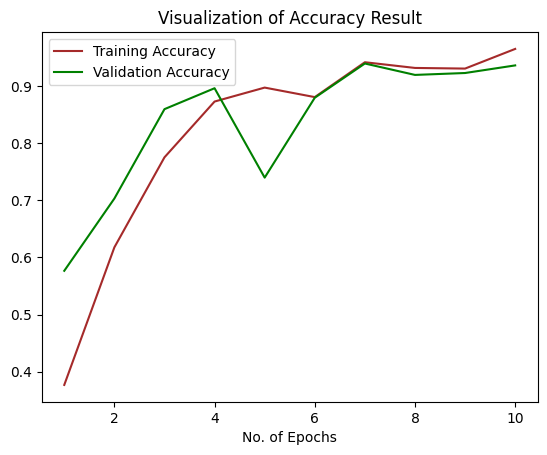

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()    